Попова Елизавета, DARP-130

# Project 4

## ЛЕГЕНДА
Вы продолжаете работу над мобильной игрой Quiz Freeze. На сей раз вам необходимо проверить несколько гипотез.

Вот список вопросов, который вы составили после встречи с командой.

### Гипотеза 1

По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

### Гипотеза 2

Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

### Гипотеза 3

Если пользователь сначала выбирает сложность, будет ли он потом проходить обучение?


## ЦЕЛЬ

Исследовать поведение пользователей в обновлённом приложении.

## ЗАДАЧИ

В рамках проверки гипотез вам необходимо решить три задачи:

1. Определить, насколько обучение сокращает время прохождения этапов игры.

2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

3. Определить, насколько прозрачен процесс взаимодействия с игрой.

## КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)

1. Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.

2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 

3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

## ЦЕЛЬ

Исследовать поведение пользователей в обновлённом приложении.

## ЗАДАЧИ

В рамках проверки гипотез вам необходимо решить три задачи:

1. Определить, насколько обучение сокращает время прохождения этапов игры.

2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.

3. Определить, насколько прозрачен процесс взаимодействия с игрой.

## КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)

1. Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.

2. Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 

3. Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

## Описание данных

### Таблица *Event*

Хранит данные о событиях, которые совершают пользователи. По сути, каждое событие — это факт прохождения пользователем какого-либо этапа игры.

**id**	идентификатор события

**user_id**	уникальный идентификатор пользователя, совершившего событие в приложении

**start_time**	дата и время события

**event_type**	тип события (значения: **registration** — регистрация; **tutorial_start** — начало обучения; **tutorial_finish** — завершение обучения; **level_choice** — выбор уровня сложности; **pack_choice** — выбор пакетов вопросов)

**tutorial_id**	идентификатор обучения (этот идентификатор есть только у событий обучения)

**selected_level**	выбранный уровень сложности обучения

### Таблица *purchase*

**id**	идентификатор события

**user_id**	уникальный идентификатор пользователя, совершившего событие в приложении

**event_datetime**	дата и время события/покупки

**amount**	сумма оплаты

In [1198]:
'''Подготовим наши данные для работы'''

# создадим dataframe из таблицы 'events'
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

events = pd.read_csv('D:\\IDE\\project\\7_4_Events.csv', sep=',')

# при переводе в формат datetime у нас в большинстве случаев возникали ошибки в данных за 2017 год, так как там использовалась несуществующая дата '2017-02-29'
# также встречаются некорректно записанные даты типа '20202019-04-16'
# к счастью, нам нужны данные только за 2018 год. все ошибки заменим на NaT
events_df = events.copy()
events_df['start_time'] = pd.to_datetime(events_df['start_time'], errors='coerce')

# выделяем год события и создаем список id пользователей, зарегистрировавшихся в 2018 году
events_df['year'] = events_df['start_time'].dt.year 
mask1 = (events_df['year'] == 2018) & (events_df['event_type'] == 'registration')
users_2018 = list(events_df[mask1]['user_id'])

# создаем маску, фильтрующую id пользователей на основе списка и изменяем events_df
mask2 = events_df['user_id'].isin(users_2018)
events_df = events_df[mask2]

# создадим dataframe из таблицы 'purchase'
purchase = pd.read_csv('D:\\IDE\\project\\purchase.csv', sep=',')
purchase_df = purchase.copy()
purchase_df['event_datetime'] = pd.to_datetime(purchase_df['event_datetime'])

# создаем маску, фильтрующую id пользователей на основе списка и изменяем purchase_df
mask3 = purchase_df['user_id'].isin(users_2018)
purchase_df = purchase_df[mask3]

# добавим в датафрейм purchase_df столбец event_type, который будет содержать одно значение purchase
purchase_df['event_type'] = 'purchase'

# переименуем столбцы в датафреймах
events_df = events_df.rename(columns={"id": "event_id"})
purchase_df = purchase_df.rename(columns={'id': 'purchase_id', 'event_datetime': 'start_time'})

# объединим таблицы, зададим новые индексы и отстортируме по дате
total_events_df = pd.concat([events_df, purchase_df],sort=False)
total_events_df = total_events_df.reset_index(drop=True).sort_values('start_time')

## Гипотеза 1

Какая разница в поведении групп, которые проходят и не проходят обучение? 
Влияет ли обучение на скорость прохождения других этапов игры?

### Задача 1

Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.

In [1199]:
#выделим пользователей, которые завершили обучение
finished_tutorial_users_set = set(total_events_df[total_events_df['event_type'] == 'tutorial_finish']['user_id'])

#выделим пользователей, которые не начали обучение
start_tutorial_users_set = set(total_events_df[total_events_df['event_type'] == 'tutorial_start']['user_id'])
mask_no_start_tutorial = total_events_df['user_id'].isin(start_tutorial_users_set) == False
df_no_start_tutorial = total_events_df[mask_no_start_tutorial]
no_start_tutorial_users_set = set(df_no_start_tutorial['user_id'])

#создадим функцию, распределяющую пользователей по группам
def get_group(id):
    if id in finished_tutorial_users_set:
        group = 'finished'
        return group
    elif id in no_start_tutorial_users_set:
        group = 'no_start'
        return group
    else:
        group = 'unfinished'
        return group
    
#добавим в датафрейм дополнительный столбец, применив функцию
total_events_df['tutorial_group'] = total_events_df['user_id'].apply(get_group)

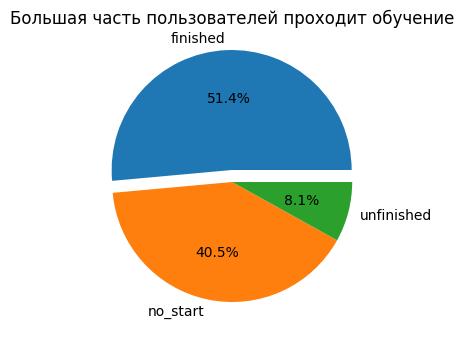

In [1200]:
users_tutorial_groups = total_events_df.groupby('tutorial_group')['user_id'].nunique()

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    users_tutorial_groups,
    labels=users_tutorial_groups.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0]
)
axes.set_title('Большая часть пользователей проходит обучение');

In [1201]:
#создадим маски для удобства фильтрации
mask_finished_tutorial = total_events_df['tutorial_group'] == 'finished'
mask_no_start_tutorial = total_events_df['tutorial_group'] == 'no_start'
mask_unfinished_tutorial = total_events_df['tutorial_group'] == 'unfinished'


mask_registration = total_events_df['event_type'] == 'registration'
mask_tutorial_start = total_events_df['event_type'] == 'tutorial_start'
mask_tutorial_finish = total_events_df['event_type'] == 'tutorial_finish'
mask_level_choice = total_events_df['event_type'] == 'level_choice'
mask_pack_choice = total_events_df['event_type'] == 'pack_choice'
mask_purchase = total_events_df['event_type'] == 'purchase'

In [1202]:
#создадим датафреймы со всеми событиями
registration_df = total_events_df[mask_registration]
registration_df = registration_df[['user_id', 'tutorial_group', 'start_time']]
registration_df = registration_df.rename(
    columns={'start_time': 'registration_time'}
)
registration_df['user_id'].value_counts().mean()

tutorial_start_df = total_events_df[mask_tutorial_start]
tutorial_start_df = tutorial_start_df[['user_id', 'tutorial_group', 'start_time']]
tutorial_start_df = tutorial_start_df.rename(
    columns={'start_time': 'tutorial_start_time'}
)
tutorial_start_df['user_id'].value_counts().mean()

tutorial_finish_df = total_events_df[mask_tutorial_finish]
tutorial_finish_df = tutorial_finish_df[['user_id', 'tutorial_group', 'start_time']]
tutorial_finish_df = tutorial_finish_df.rename(
    columns={'start_time': 'tutorial_finish_time'}
)
tutorial_finish_df['user_id'].value_counts().mean()

level_choice_df = total_events_df[mask_level_choice]
level_choice_df = level_choice_df[['user_id', 'tutorial_group', 'start_time']]
level_choice_df = level_choice_df.rename(
    columns={'start_time': 'level_choice_time'}
)
level_choice_df['user_id'].value_counts().mean()

pack_choice_df = total_events_df[mask_pack_choice]
pack_choice_df = pack_choice_df[['user_id', 'tutorial_group', 'start_time']]
pack_choice_df = pack_choice_df.rename(
    columns={'start_time': 'pack_choice_time'}
)
pack_choice_df['user_id'].value_counts().mean()

purchase_df = total_events_df[mask_purchase]
purchase_df = purchase_df[['user_id', 'tutorial_group', 'start_time']]
purchase_df = purchase_df.rename(
    columns={'start_time': 'purchase_time'}
)
purchase_df['user_id'].value_counts().mean()


1.0

Посмотрим на воронку пользователей, ни разу не начинавших обучение

,no_start
registration,8068
tutorial_start,0
tutorial_finish,0
level_choice,98
pack_choice,74
purchase,22


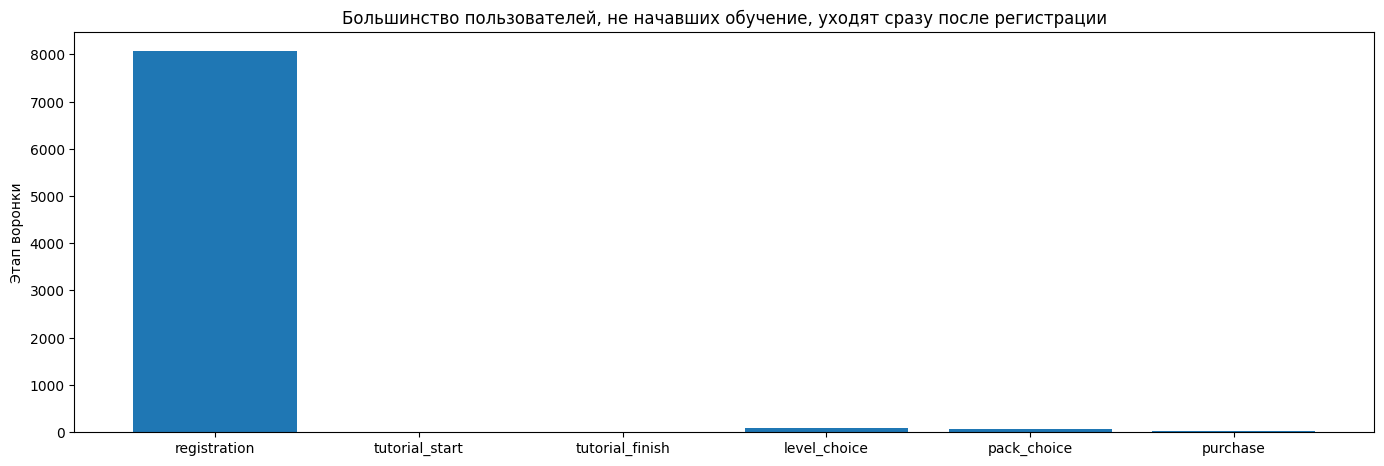

In [1203]:
funnel_df = pd.DataFrame({
    'registration': [registration_df[registration_df['tutorial_group'] == 'no_start']['user_id'].nunique()],
    'tutorial_start': [0],
    'tutorial_finish': [0],
    'level_choice': [level_choice_df[level_choice_df['tutorial_group'] == 'no_start']['user_id'].nunique()],
    'pack_choice': [pack_choice_df[pack_choice_df['tutorial_group'] == 'no_start']['user_id'].nunique()],
    'purchase': [purchase_df[purchase_df['tutorial_group'] == 'no_start']['user_id'].nunique()]
}, 
                         index=['no_start']
)
funnel_df = funnel_df.T

display(funnel_df)

fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = funnel_df.index, height = funnel_df['no_start'])
axes.set_ylabel('Число пользователей')
axes.set_ylabel('Этап воронки')
axes.set_title('Большинство пользователей, не начавших обучение, уходят сразу после регистрации');

In [1204]:
purchase_rate_no_start = funnel_df['no_start'].purchase / funnel_df['no_start'].registration

print(
    'Процент пользователей, совершивших оплату от числа всех, кто не выбрал уровень: {:.2%}'.format(
        purchase_rate_no_start
    )
)

Процент пользователей, совершивших оплату от числа всех, кто не выбрал уровень: 0.27%


Представим воронку для пользователей, завершивших обучение

registration       10250
tutorial_start     10250
tutorial_finish    10250
level_choice        7501
pack_choice         5176
purchase            1447
Name: finished, dtype: int64

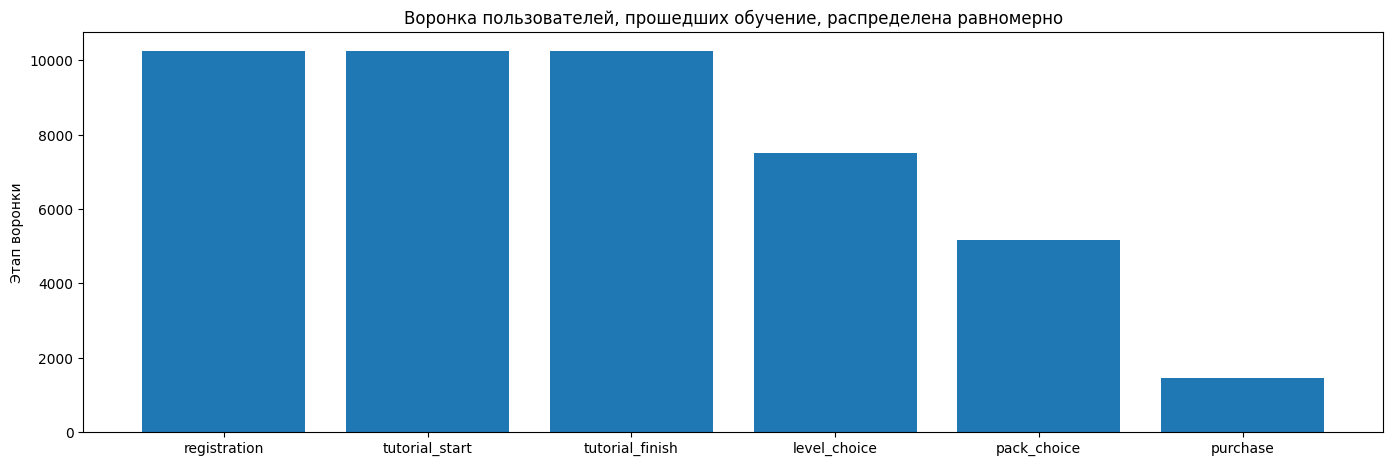

In [1205]:
funnel_df['finished'] = [registration_df[registration_df['tutorial_group'] == 'finished']['user_id'].nunique(),
tutorial_start_df[tutorial_start_df['tutorial_group'] == 'finished']['user_id'].nunique(),
tutorial_finish_df[tutorial_finish_df['tutorial_group'] == 'finished']['user_id'].nunique(),
level_choice_df[level_choice_df['tutorial_group'] == 'finished']['user_id'].nunique(),
pack_choice_df[pack_choice_df['tutorial_group'] == 'finished']['user_id'].nunique(),
purchase_df[purchase_df['tutorial_group'] == 'finished']['user_id'].nunique()]

display(funnel_df['finished'])

fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = funnel_df.index, height = funnel_df['finished'])
axes.set_ylabel('Число пользователей')
axes.set_ylabel('Этап воронки')
axes.set_title('Воронка пользователей, прошедших обучение, распределена равномерно');

In [1206]:
purchase_rate_unfinished = funnel_df['finished'].purchase / funnel_df['finished'].registration

print(
    'Процент пользователей, совершивших оплату от числа всех, кто прошел обучение: {:.2%}'.format(
        purchase_rate_unfinished
    )
)

Процент пользователей, совершивших оплату от числа всех, кто прошел обучение: 14.12%


Представим воронку пользователей, не завершивших обучение

registration       1608
tutorial_start     1608
tutorial_finish       0
level_choice        743
pack_choice         487
purchase            131
Name: unfinished, dtype: int64

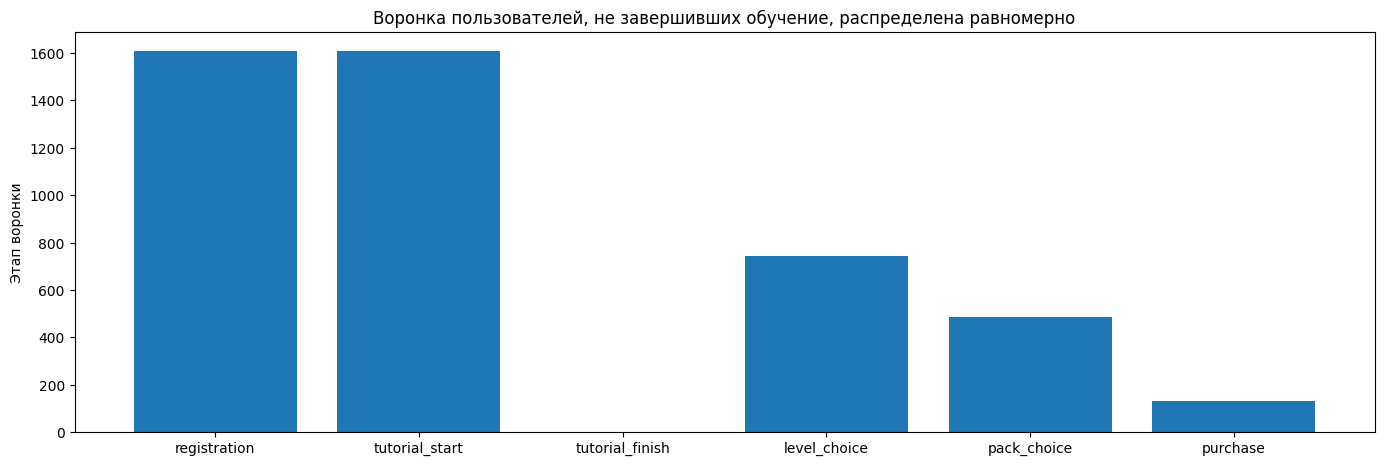

In [1207]:
funnel_df['unfinished'] = [registration_df[registration_df['tutorial_group'] == 'unfinished']['user_id'].nunique(),
tutorial_start_df[tutorial_start_df['tutorial_group'] == 'unfinished']['user_id'].nunique(),
tutorial_finish_df[tutorial_finish_df['tutorial_group'] == 'unfinished']['user_id'].nunique(),
level_choice_df[level_choice_df['tutorial_group'] == 'unfinished']['user_id'].nunique(),
pack_choice_df[pack_choice_df['tutorial_group'] == 'unfinished']['user_id'].nunique(),
purchase_df[purchase_df['tutorial_group'] == 'unfinished']['user_id'].nunique()]

display(funnel_df['unfinished'])

fig = plt.figure(figsize=(13, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = funnel_df.index, height = funnel_df['unfinished'])
axes.set_ylabel('Число пользователей')
axes.set_ylabel('Этап воронки')
axes.set_title('Воронка пользователей, не завершивших обучение, распределена равномерно');

In [1208]:
purchase_rate_unfinished = funnel_df['unfinished'].purchase / funnel_df['unfinished'].registration

print(
    'Процент пользователей, совершивших оплату от числа тех, кто не завершил обучение: {:.2%}'.format(
        purchase_rate_unfinished
    )
)

Процент пользователей, совершивших оплату от числа тех, кто не завершил обучение: 8.15%


Посмотрим, как различается в наших группах время прохождения следующих этапов:

- от регистрации до оплаты
- от выбора уровня до выбора пакета вопросов
- от выбора пакета вопросов до оплаты

In [1209]:
#за какое время от регистрации до оплаты дошли пользователи, завершившие обучение
merged_registration_purchase_tutorial_finished = registration_df[registration_df['tutorial_group'] == 'finished'].merge(purchase_df[purchase_df['tutorial_group'] == 'finished'], on='user_id', how='inner')
merged_registration_purchase_tutorial_finished['timedelta'] = merged_registration_purchase_tutorial_finished['purchase_time'] - merged_registration_purchase_tutorial_finished['registration_time']

In [1210]:
#за какое время от регистрации до оплаты дошли пользователи, не завершившие обучение
merged_registration_purchase_tutorial_unfinished = registration_df[registration_df['tutorial_group'] == 'unfinished'].merge(purchase_df[purchase_df['tutorial_group'] == 'unfinished'], on='user_id', how='inner')
merged_registration_purchase_tutorial_unfinished['timedelta'] = merged_registration_purchase_tutorial_finished['purchase_time'] - merged_registration_purchase_tutorial_finished['registration_time']

In [1211]:
#за какое время от регистрации до оплаты дошли пользователи, не начинавшие обучение
merged_registration_purchase_no_start = registration_df[registration_df['tutorial_group'] == 'no_start'].merge(purchase_df[purchase_df['tutorial_group'] == 'no_start'], on='user_id', how='inner')
merged_registration_purchase_no_start['timedelta'] = merged_registration_purchase_no_start['purchase_time'] - merged_registration_purchase_no_start['registration_time']

In [1212]:
#за какое время от выбора уровня сложности до выбора пакета вопросов дошли пользователи, завершившие обучение
merged_level_pack_choice_finished = level_choice_df[level_choice_df['tutorial_group'] == 'finished'].merge(pack_choice_df[pack_choice_df['tutorial_group'] == 'finished'], on='user_id', how='inner')
merged_level_pack_choice_finished['timedelta'] = merged_level_pack_choice_finished['pack_choice_time'] - merged_level_pack_choice_finished['level_choice_time']

In [1213]:
#за какое время от выбора уровня сложности до выбора пакета вопросов дошли пользователи, не завершившие обучение
merged_level_pack_choice_unfinished = level_choice_df[level_choice_df['tutorial_group'] == 'unfinished'].merge(pack_choice_df[pack_choice_df['tutorial_group'] == 'unfinished'], on='user_id', how='inner')
merged_level_pack_choice_unfinished['timedelta'] = merged_level_pack_choice_unfinished['pack_choice_time'] - merged_level_pack_choice_unfinished['level_choice_time']

In [1214]:
#за какое время от выбора уровня сложности до выбора пакета вопросов дошли пользователи, не начинавшие обучение
merged_level_pack_choice_no_start = level_choice_df[level_choice_df['tutorial_group'] == 'no_start'].merge(pack_choice_df[pack_choice_df['tutorial_group'] == 'no_start'], on='user_id', how='inner')
merged_level_pack_choice_no_start['timedelta'] = merged_level_pack_choice_no_start['pack_choice_time'] - merged_level_pack_choice_no_start['level_choice_time']

In [1215]:
#за какое время от выбора пакета вопросов до оплаты дошли пользователи, завершившие обучение
merged_pack_choice_purchase_finished = pack_choice_df[pack_choice_df['tutorial_group'] == 'finished'].merge(purchase_df[purchase_df['tutorial_group'] == 'finished'], on='user_id', how='inner')
merged_pack_choice_purchase_finished['timedelta'] = merged_pack_choice_purchase_finished['purchase_time'] - merged_pack_choice_purchase_finished['pack_choice_time']

In [1216]:
#за какое время от выбора пакета вопросов до оплаты дошли пользователи, не завершившие обучение
merged_pack_choice_purchase_unfinished = pack_choice_df[pack_choice_df['tutorial_group'] == 'unfinished'].merge(purchase_df[purchase_df['tutorial_group'] == 'unfinished'], on='user_id', how='inner')
merged_pack_choice_purchase_unfinished['timedelta'] = merged_pack_choice_purchase_unfinished['purchase_time'] - merged_pack_choice_purchase_unfinished['pack_choice_time']

In [1217]:
#за какое время от выбора пакета вопросов до оплаты дошли пользователи, не начинавшие обучение
merged_pack_choice_purchase_no_start = pack_choice_df[pack_choice_df['tutorial_group'] == 'no_start'].merge(purchase_df[purchase_df['tutorial_group'] == 'no_start'], on='user_id', how='inner')
merged_pack_choice_purchase_no_start['timedelta'] = merged_pack_choice_purchase_no_start['purchase_time'] - merged_pack_choice_purchase_no_start['pack_choice_time']

In [1218]:
#объединим полученные данные в один датафрейм
timedelta_df = pd.DataFrame({
    'registration_purchase_delta': [merged_registration_purchase_tutorial_finished['timedelta'].mean(), merged_registration_purchase_tutorial_unfinished['timedelta'].mean(), merged_registration_purchase_no_start['timedelta'].mean()],
    'level_pack_choice_delta': [merged_level_pack_choice_finished['timedelta'].mean(), merged_level_pack_choice_unfinished['timedelta'].mean(), merged_level_pack_choice_no_start['timedelta'].mean()],
    'pack_choice_purchase_delta': [merged_pack_choice_purchase_finished['timedelta'].mean(), merged_pack_choice_purchase_unfinished['timedelta'].mean(), merged_pack_choice_purchase_no_start['timedelta'].mean()]
}, 
                            index=['finished', 'unfinished', 'no_start']
)

In [1219]:
display(timedelta_df['registration_purchase_delta'].sort_values())

unfinished   3 days 20:12:05.610687022
finished     4 days 00:30:03.247408431
no_start     4 days 09:06:01.909090909
Name: registration_purchase_delta, dtype: timedelta64[ns]

Меньше всего от регистрации до оплаты проходит времени у группы с незаконченным обучением, больше всего - у группы с неначатым обучением

In [1220]:
display(timedelta_df['level_pack_choice_delta'].sort_values())

unfinished   0 days 00:05:05.295687885
finished     0 days 00:05:18.146058732
no_start     0 days 00:05:23.824324324
Name: level_pack_choice_delta, dtype: timedelta64[ns]

Меньше всего от выбора уровня до выбора пакета вопросов проходит времени у группы с незаконченным обучением, больше всего - у группы с неначатым обучением

In [1221]:
display(timedelta_df['pack_choice_purchase_delta'].sort_values())

finished     3 days 17:17:59.641326883
unfinished   3 days 21:14:46.908396946
no_start     4 days 04:49:33.590909090
Name: pack_choice_purchase_delta, dtype: timedelta64[ns]

Меньше всего от выбора пакета вопросов до оплаты проходит времени у группы с законченным обучением, больше всего - у группы с неначатым обучением

## Выводы по гипотезе 1

Итак, из 19 926 пользователей, которые взаимодействовали с игрой: 
- 51% завершило обучение (10 250 пользователей)
- 40.5% не начало обучение (8 068 пользователей)
- 8% начало, но не завершило обучение (1 608 пользователей)

**Обучение - очень важный этап взаимодейтсвия с игрой, который, возможно, стоит сделать обязательным.** Практически вся группа пользователей, не начинавших обучение, не перешла даже к выбору уровня сложности.

Наибольший процент конверсии из регистрации в покупку  - у группы прошедших обучение пользователей: 14% из них (1 447 пользователей) приобрели платный пакет вопросов. У пользователей, которые завершили обучение, конверсия ниже - 8% (131 пользователь). И у пользователей, которые не начинали обучение, конверсия совсем низкая - меньше процента (22 пользователя).

Сложно сравнивать время на прохождение этапов игры для пользователей, завершивших обучение и не начинавших его, - вторых крайне мало. В среднем пользователи, завершившие обучение, проходят этапы игры медленнее, чем пользователи, не завершившие обчение.

## Гипотеза 2

Влияет ли повторное прохождение обучения на оплату положительно?


### Задача 2 

Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. 


In [1222]:
#рассчитаем, сколько раз пользователь проходил обучение и создадим новый столбец в нашем датафрейме

tutorial_starts = total_events_df[total_events_df['event_type'] == 'tutorial_start'].groupby(['user_id'])['event_type'].count()


def get_tutorial_starts(id):
    if id in tutorial_starts.index:
        count = tutorial_starts.loc[id]
        return count
    else:
        count = 0
        return count

total_events_df['tutorial_starts_count'] = total_events_df['user_id'].apply(get_tutorial_starts)

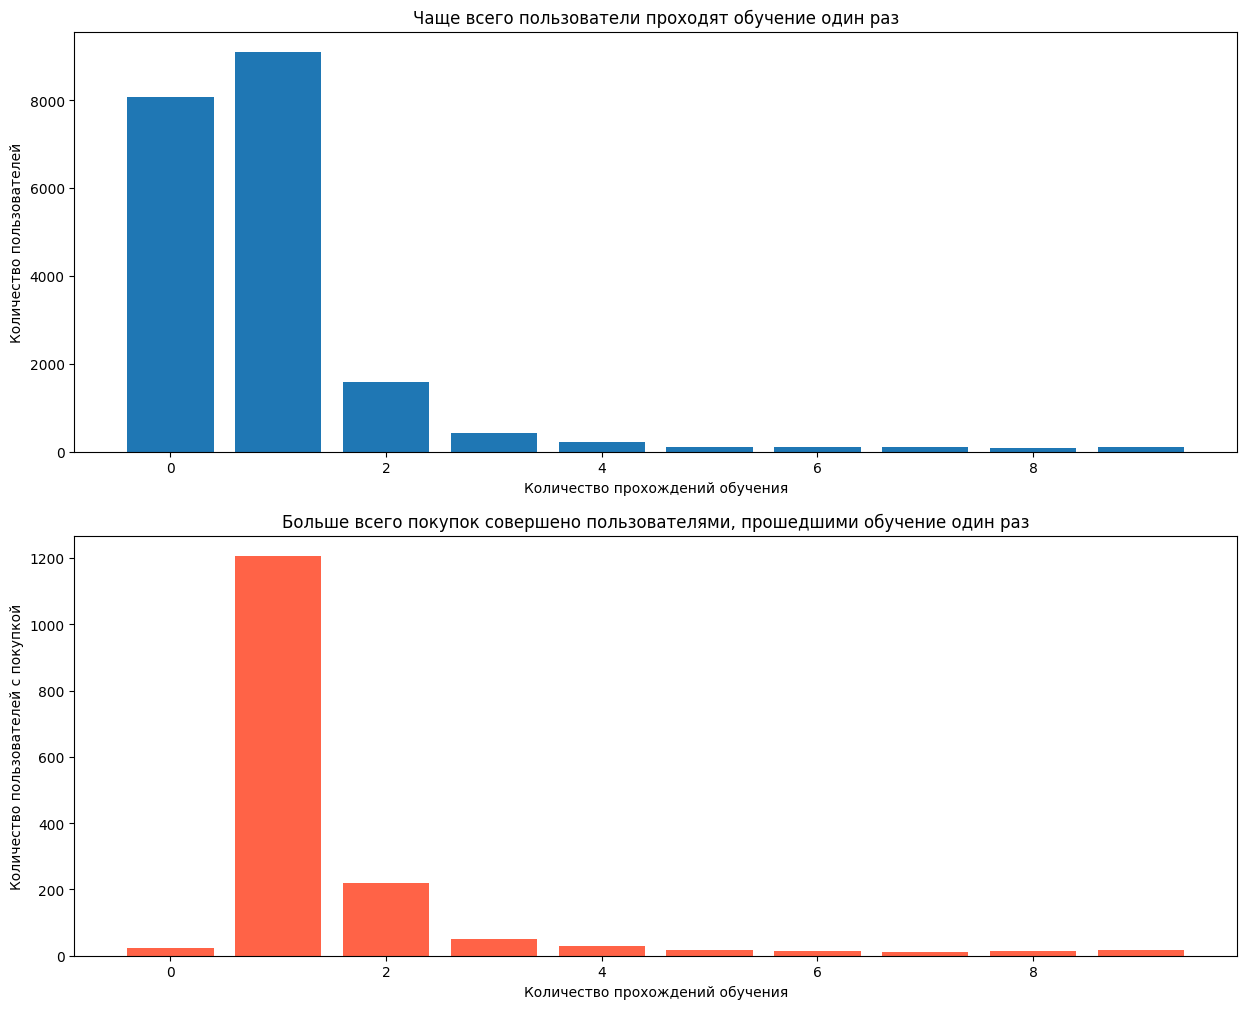

In [1223]:
users_by_tutorial_start_count = total_events_df.groupby('tutorial_starts_count')['user_id'].nunique()
purchases_by_tutorial_start_count = total_events_df[mask_purchase].groupby('tutorial_starts_count')['user_id'].nunique()

users_by_tutorial_start = pd.merge(users_by_tutorial_start_count, purchases_by_tutorial_start_count, right_index=True, left_index=True)
users_by_tutorial_start = users_by_tutorial_start.rename(
    columns = {'user_id_x': 'total_users',
               'user_id_y': 'purchased_users'}
)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
axes[0].bar(x=users_by_tutorial_start.index, 
    height=users_by_tutorial_start['total_users'],
    label='Число пользователей'
)
axes[0].set_title('Чаще всего пользователи проходят обучение один раз')
axes[0].set_xlabel('Количество прохождений обучения')
axes[0].set_ylabel('Количество пользователей')


axes[1].bar(x=users_by_tutorial_start.index,
    height=users_by_tutorial_start['purchased_users'],
    label='Число купивших',
    color='tomato', lw=2
)
axes[1].set_title('Больше всего покупок совершено пользователями, прошедшими обучение один раз')
axes[1].set_xlabel('Количество прохождений обучения')
axes[1].set_ylabel('Количество пользователей с покупкой');


In [1224]:
users_by_tutorial_start['not_purchased_users'] = users_by_tutorial_start['total_users'] - users_by_tutorial_start['purchased_users']
users_by_tutorial_start['purchase_rate'] = users_by_tutorial_start['purchased_users'] / users_by_tutorial_start['total_users'] * 100
display(users_by_tutorial_start)

,total_users,purchased_users,not_purchased_users,purchase_rate
tutorial_starts_count,,,,
0,8068,22,8046,0.272682
1,9103,1207,7896,13.259365
2,1589,218,1371,13.719320
3,427,51,376,11.943794
4,221,30,191,13.574661
5,109,16,93,14.678899
6,116,14,102,12.068966
7,94,12,82,12.765957
8,86,13,73,15.116279


Мы видим, что у пользователей, начинавших обучение 2 или более раз, конверсия в покупку примерно одинаковая, поэтому добавим их в одну группу: "2 и более покупок", чтобы визуализация была нагляднее.

In [1225]:

users_by_tutorial_start_transposed = users_by_tutorial_start[['purchased_users', 'not_purchased_users']].T
users_by_tutorial_start_transposed['>= 2'] = users_by_tutorial_start_transposed[[2, 3, 4, 5, 6, 7, 8, 9]].sum(axis=1)
users_by_tutorial_start_transposed = users_by_tutorial_start_transposed.drop([2, 3, 4, 5, 6, 7, 8, 9], axis=1)

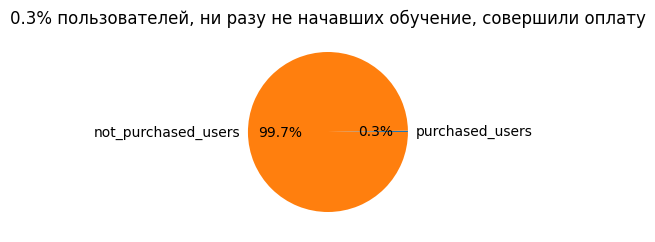

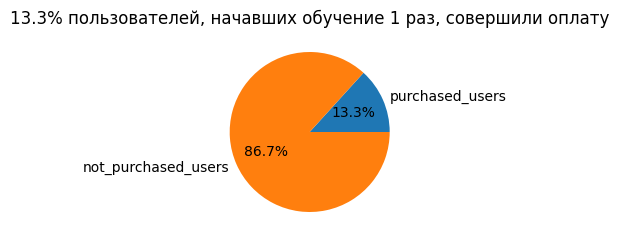

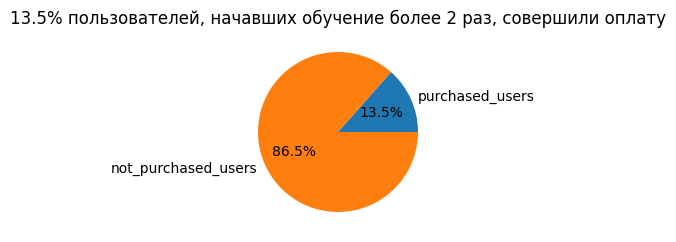

In [1226]:
fig = plt.figure(figsize=(2, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    users_by_tutorial_start_transposed[0],
    labels=users_by_tutorial_start_transposed.index,
    autopct='%.1f%%',
)
axes.set_title('0.3% пользователей, ни разу не начавших обучение, совершили оплату');

fig = plt.figure(figsize=(2, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    users_by_tutorial_start_transposed[1],
    labels=users_by_tutorial_start_transposed.index,
    autopct='%.1f%%',
)
axes.set_title('13.3% пользователей, начавших обучение 1 раз, совершили оплату');

fig = plt.figure(figsize=(2, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    users_by_tutorial_start_transposed['>= 2'],
    labels=users_by_tutorial_start_transposed.index,
    autopct='%.1f%%',
)
axes.set_title('13.5% пользователей, начавших обучение более 2 раз, совершили оплату');

In [1227]:
#рассчитаем, сколько раз пользователь завершал обучение и создадим новый столбец в нашем датафрейме

tutorial_finishes = total_events_df[total_events_df['event_type'] == 'tutorial_finish'].groupby(['user_id'])['event_type'].count()


def get_tutorial_finish(id):
    if id in tutorial_finishes.index:
        count = tutorial_finishes.loc[id]
        return count
    else:
        count = 0
        return count

total_events_df['tutorial_finish_count'] = total_events_df['user_id'].apply(get_tutorial_finish)

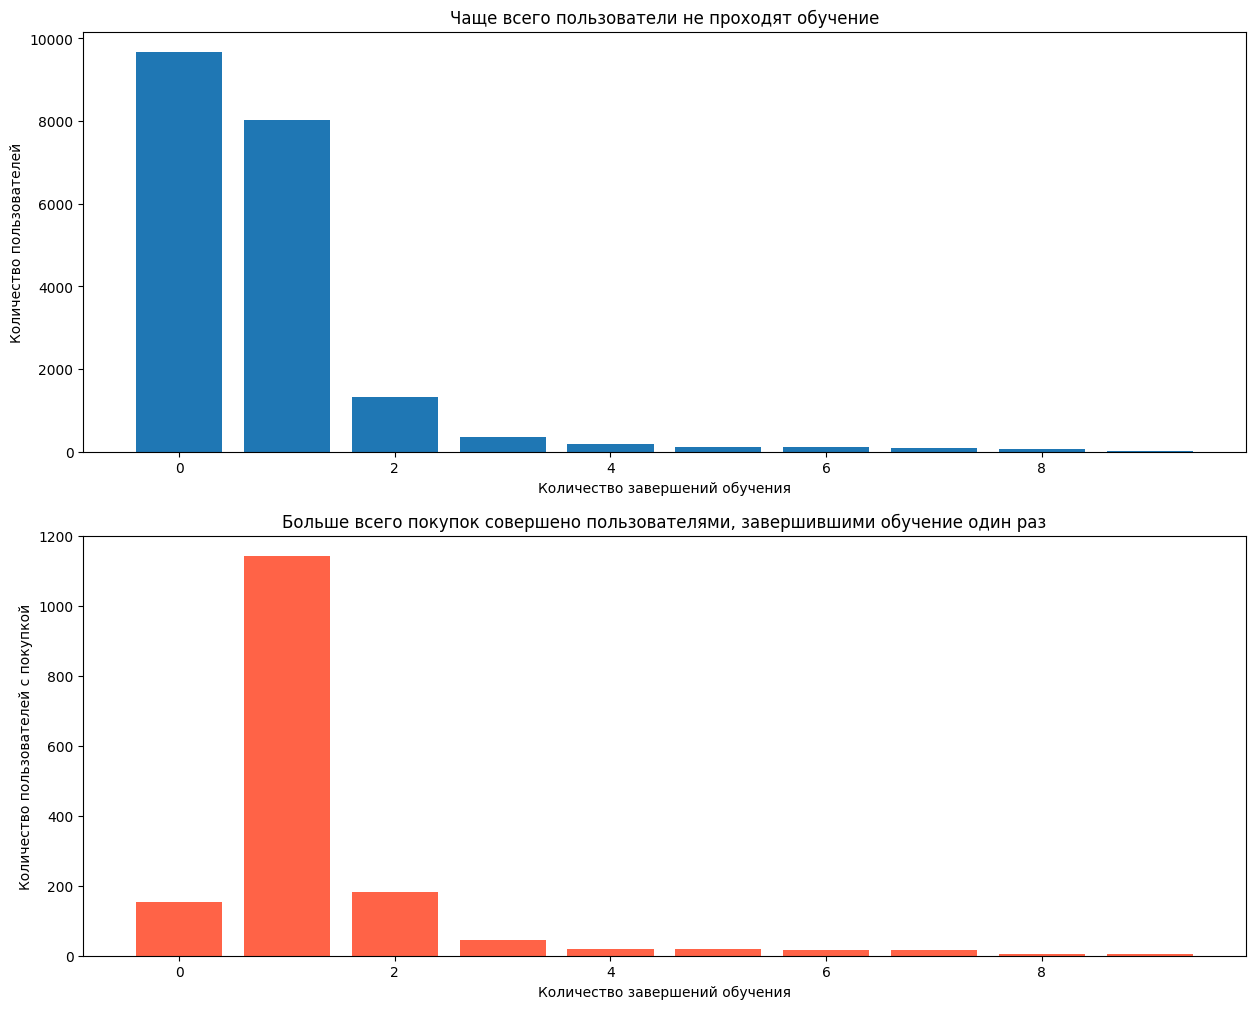

In [1228]:
users_by_tutorial_finish_count = total_events_df.groupby('tutorial_finish_count')['user_id'].nunique()
purchases_by_tutorial_finish_count = total_events_df[mask_purchase].groupby('tutorial_finish_count')['user_id'].nunique()

users_by_tutorial_finish = pd.merge(users_by_tutorial_finish_count, purchases_by_tutorial_finish_count, right_index=True, left_index=True)
users_by_tutorial_finish = users_by_tutorial_finish.rename(
    columns = {'user_id_x': 'total_users',
               'user_id_y': 'purchased_users'}
)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
axes[0].bar(x=users_by_tutorial_finish.index, 
    height=users_by_tutorial_finish['total_users'],
    label='Число пользователей'
)
axes[0].set_title('Чаще всего пользователи не проходят обучение')
axes[0].set_xlabel('Количество завершений обучения')
axes[0].set_ylabel('Количество пользователей')


axes[1].bar(x=users_by_tutorial_finish.index,
    height=users_by_tutorial_finish['purchased_users'],
    label='Число купивших',
    color='tomato', lw=2
)
axes[1].set_title('Больше всего покупок совершено пользователями, завершившими обучение один раз')
axes[1].set_xlabel('Количество завершений обучения')
axes[1].set_ylabel('Количество пользователей с покупкой');

In [1229]:
users_by_tutorial_finish['not_purchased_users'] = users_by_tutorial_finish['total_users'] - users_by_tutorial_finish['purchased_users']
users_by_tutorial_finish['purchase_rate'] = users_by_tutorial_finish['purchased_users'] / users_by_tutorial_finish['total_users'] * 100
display(users_by_tutorial_finish)

,total_users,purchased_users,not_purchased_users,purchase_rate
tutorial_finish_count,,,,
0,9676,153,9523,1.581232
1,8015,1143,6872,14.260761
2,1321,182,1139,13.777441
3,345,44,301,12.753623
4,178,19,159,10.674157
5,117,19,98,16.239316
6,101,15,86,14.851485
7,97,15,82,15.463918
8,54,6,48,11.111111


Для лучшей визуализации оставим только три группы пользователей: не завершившие обучение ни разу, завершившие обучение 1 раз и завершившие обучение более 2 раз.

In [1230]:

users_by_tutorial_finish_transposed = users_by_tutorial_finish[['purchased_users', 'not_purchased_users']].T
users_by_tutorial_finish_transposed['>= 2'] = users_by_tutorial_finish_transposed[[2, 3, 4, 5, 6, 7, 8, 9]].sum(axis=1)
users_by_tutorial_finish_transposed = users_by_tutorial_finish_transposed.drop([2, 3, 4, 5, 6, 7, 8, 9], axis=1)

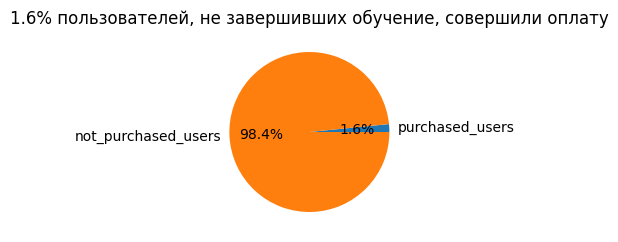

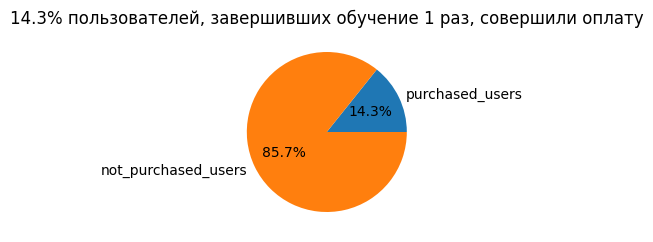

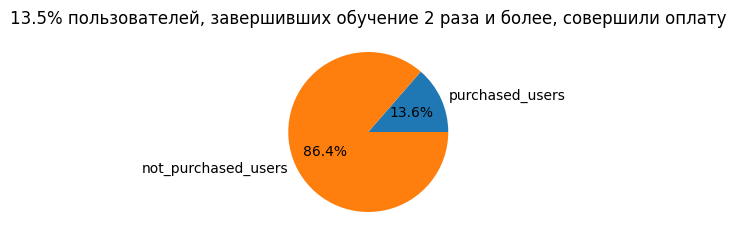

In [1231]:
fig = plt.figure(figsize=(2, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    users_by_tutorial_finish_transposed[0],
    labels=users_by_tutorial_finish_transposed.index,
    autopct='%.1f%%',
)
axes.set_title('1.6% пользователей, не завершивших обучение, совершили оплату');

fig = plt.figure(figsize=(2, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    users_by_tutorial_finish_transposed[1],
    labels=users_by_tutorial_finish_transposed.index,
    autopct='%.1f%%',
)
axes.set_title('14.3% пользователей, завершивших обучение 1 раз, совершили оплату');

fig = plt.figure(figsize=(2, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    users_by_tutorial_finish_transposed['>= 2'],
    labels=users_by_tutorial_finish_transposed.index,
    autopct='%.1f%%',
)
axes.set_title('13.5% пользователей, завершивших обучение 2 раза и более, совершили оплату');

## Выводы по гипотезе 2

**Вне зависимости от того, сколько раз пользователь начинал или заканчивал обучение, вероятность, что он совершит оплату, практически не меняется. Вероятность оплаты крайне низкая, если пользователь не начинал обучение**

Всего начинало обучение хотя бы раз 9 103 пользователя. Из них 13% совершили покупку (1 207 пользователей). 2 755 пользователя начинали обучение более одного раза (от двух до девяти). Из них 13.5% совершили покупку (371 пользователь). Но из 8 068 пользователей, не начинавших обучение ни разу, лишь 22 совершили покупку, - менее 1%.

Всего завершило обучение 8 015 пользователей. Из них 14% совершило покупку (1 143 пользователя) 2 235 пользователей прошли обучение несколько раз (от одного до девяти). Также 14% из них совершили покупку (304 пользователя). Из группы пользователей, не завершивших обучение, оплатило пакет вопросов лишь 2% процента (153 пользователя).

## Гипотеза 3

Если пользователь сначала выбирает сложность, будет ли он потом проходить обучение?

## Задача 3 

Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

In [1232]:
user_path_df = (
    total_events_df.groupby(["user_id"])["event_type"].apply(list).reset_index()
)

user_path_df["event_path"] = user_path_df["event_type"].apply(lambda x: " > ".join(x))
user_path_df["event_path"]

user_paths = (
    
    user_path_df.groupby(["event_path"])["user_id"]
    .nunique()
    .sort_values(ascending=False)
)

back_to_tutorial_count = user_paths[user_paths.index.str.contains('level_choice > tutorial_start')].sum()
print('После выбора уровня сложности', back_to_tutorial_count, 'пользователей возвращались у обучению')

level_choice_users_count = total_events_df[mask_level_choice]['user_id'].nunique()
back_to_tutorial_rate = back_to_tutorial_count / level_choice_users_count

print('Это {:.2%}'.format(back_to_tutorial_rate), 'от числа всех пользователей, дошедших до этапа выбора уровня сложности')

print()

back_to_tutorial_count2 = user_paths[user_paths.index.str.contains('pack_choice > tutorial_start')].sum()
print('После выбора пакета вопросов', back_to_tutorial_count2, 'пользователя возвращались у обучению')
pack_choice_users_count = total_events_df[mask_level_choice]['user_id'].nunique()
back_to_tutorial_rate2 = back_to_tutorial_count2 / pack_choice_users_count
print('Это {:.2%}'.format(back_to_tutorial_rate2), 'от числа всех пользователей, дошедших до этапа выбора пакета вопросов')

print()

back_to_tutorial_count3 = user_paths[user_paths.index.str.contains('purchase > tutorial_start')].sum()
print('После приобретения платных вопросов', back_to_tutorial_count3, 'пользователя возвращались у обучению')


После выбора уровня сложности 490 пользователей возвращались у обучению
Это 5.87% от числа всех пользователей, дошедших до этапа выбора уровня сложности

После выбора пакета вопросов 903 пользователя возвращались у обучению
Это 10.82% от числа всех пользователей, дошедших до этапа выбора пакета вопросов

После приобретения платных вопросов 3 пользователя возвращались у обучению


## Вывод по гипотезе 3

**В игре не просто разобраться без обучения.**

Многие пользователи возвращались к обучению после выбора уровня или пакета вопросов, некоторые даже повторно.

После выбора уровня 6% (490) пользователей вернулись к обчению, а после выбора бесплатного пакета вопросов - 11% (903) пользователей.

Обучение помогает пользователям ориентроваться в игре, самостоятельно это сделать сложнее.

### Общий вывод

Прохождение обучения влияет на вероятность того, совершит ли пользователь покупку, причем вне зависимости от того, на каком этапе пользователь его начал и сколько раз он это сделал. Даже у групп пользователей, не завершивших обучение, вероятность оплаты выше.

Значительная часть пользователей заканчивает взаимодействие с игрой сразу после регистрации. Возможно, если сделать этап обучения обязательным, какая-то часть из них задержится в игре. Тем более, что многие пользователи возвращаются к обучению на более поздних этапах - без обучения процесс игры не прозрачен для всех.